# Importing libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.image import imread

# Importing Dataset

In [2]:
dataset = pd.read_csv('english.csv')
print(dataset)

                   image label
0     Img/img001-001.png     0
1     Img/img001-002.png     0
2     Img/img001-003.png     0
3     Img/img001-004.png     0
4     Img/img001-005.png     0
...                  ...   ...
3405  Img/img062-051.png     z
3406  Img/img062-052.png     z
3407  Img/img062-053.png     z
3408  Img/img062-054.png     z
3409  Img/img062-055.png     z

[3410 rows x 2 columns]


# Importing images from dataset
## resizing image to 18x24 pixels

In [3]:
from skimage.transform import resize
x,y = [],[]
for i in range(550,1980):
    img = imread(dataset.iloc[i,0])
    img = resize(img,(18,24))
    x.append(img)
    y.append(dataset.iloc[i,1])

## Converting x,y to numpy arrays

In [4]:
x = np.array(x)
y = np.array(y)

## Splitting data into train and test sets

In [5]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

## visualising first 4 images from training set

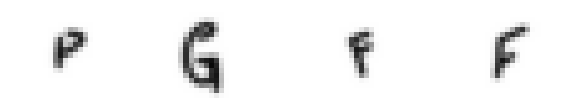

In [6]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, x_train, y_train):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')

## reshaping the arrays to train (flatining images)

In [7]:
x_train = x_train.reshape((len(x_train),-1))
x_test = x_test.reshape((len(x_test),-1))

# Training and testing our model

In [36]:
from sklearn.svm import SVC
classifier = SVC(gamma=0.04,C=7)
classifier.fit(x_train,y_train)

SVC(C=7, gamma=0.04)

In [37]:
y_pred = classifier.predict(x_test)

## Checking accuracy and confusion matrix for our model 

In [38]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cm = confusion_matrix(y_test,y_pred,labels=classifier.classes_)
print(cm)
print(accuracy_score(y_test,y_pred))

[[19  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 1  6  0  0  1  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0
   0  0]
 [ 0  0  8  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 0  0  0  7  1  0  0  0  0  0  0  0  0  0  1  1  0  0  0  0  0  0  0  0
   0  0]
 [ 0  0  0  0  7  1  0  0  0  0  1  0  0  0  0  1  0  0  1  0  0  0  0  0
   0  0]
 [ 0  0  0  0  0  7  0  0  0  0  1  0  0  0  0  4  0  0  0  0  0  0  0  0
   0  0]
 [ 0  0  0  0  0  0  6  1  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0
   0  0]
 [ 0  1  0  0  0  0  0  9  0  0  1  0  0  1  0  1  0  0  0  0  0  0  1  0
   0  0]
 [ 0  0  0  0  0  0  0  0 12  1  0  0  0  0  0  0  0  0  1  0  0  0  0  1
   0  1]
 [ 0  0  0  0  0  0  0  0  0 10  0  0  0  0  0  0  0  0  1  0  0  0  0  0
   0  0]
 [ 1  0  0  0  1  0  0  0  0  0  9  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 0  0  1  0  0  0  0  0  1  0  0 10  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 0

In [39]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           A       0.90      0.95      0.93        20
           B       0.67      0.67      0.67         9
           C       0.89      0.89      0.89         9
           D       0.64      0.70      0.67        10
           E       0.58      0.64      0.61        11
           F       0.88      0.58      0.70        12
           G       1.00      0.75      0.86         8
           H       0.75      0.64      0.69        14
           I       0.86      0.75      0.80        16
           J       0.83      0.91      0.87        11
           K       0.75      0.82      0.78        11
           L       1.00      0.83      0.91        12
           M       0.67      0.80      0.73         5
           N       0.78      0.78      0.78         9
           O       0.83      0.77      0.80        13
           P       0.22      1.00      0.36         2
           Q       0.64      0.78      0.70         9
           R       1.00    